In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline

sns.set(style="white")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./df_foodaccess_allmortality_SVI.csv')

In [3]:
# Create feature list with percentage metrics
features_proportional_share = ['lablack10share', 'lablack20share', 
                               'lahisp10share', 'lahisp20share', 
                               'lahunv10share', 'lahunv20share', 
                               'lasnap10share', 'lasnap20share',
                               'lawhite10share', 'lawhite20share',
                               'lalowi10share', 'lalowi20share', 
                               'lapop10share', 'lapop20share',
                               #'GroupQuartersFlag', 
                               #'PovertyRate', LowIncomeTracts'
                               #'LILATracts_1And10', 'LILATracts_1And20',
                               #'LILATracts_Vehicle', 'LILATracts_halfAnd10', 
                               #'LA1and10', 'LA1and20', 'LAhalfand10'
                              ]

In [4]:
# Set age adjusted rates as targets
target_list = ['Age Adjusted Rate Endocrine',
               'Age Adjusted Rate Obesity', 'Age Adjusted Rate Metabolic', 'Age Adjusted Rate Diabetes', 
               'Age Adjusted Rate Circulatory',
               'Age Adjusted Rate Pulmonary', 'Age Adjusted Rate Arteries', 'Age Adjusted Rate Hypertension',
               'Age Adjusted Rate External',
               'Age Adjusted Rate Assault', 'Age Adjusted Rate Intentional', 'Age Adjusted Rate Transport',
               'Age Adjusted Rate Mental',
               'Age Adjusted Rate Psychoactive',
               'Age Adjusted Rate Neoplasms', 
               'Age Adjusted Rate MalignantDigestive', 'Age Adjusted Rate MalignantBreast', 'Age Adjusted Rate MalignantFemale', 'Age Adjusted Rate MalignantMale', 'Age Adjusted Rate MalignantEndocrine',
               'Age Adjusted Rate All']

In [5]:
# Log transformation
for feature in features_proportional_share:
    df[f'{feature} Log10'] = np.log10(df[feature])
    
# Create new Log10 feature list
features_proportional_share_Log10 = [f'{x} Log10' for x in features_proportional_share]

# Convert -inf to 0
for log_feature in features_proportional_share_Log10:
    df.loc[df[log_feature] == -np.inf, log_feature] = 0

# Convert nans to 0
for feature in features_proportional_share:
    df.loc[df[feature].isna(), feature] = 0

In [6]:
df.loc[df[log_feature] == -np.inf, log_feature] = 0

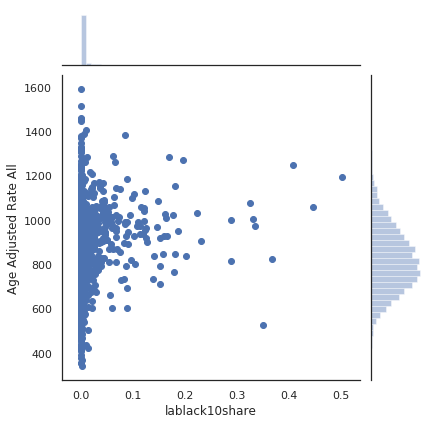

In [7]:
sns.jointplot(data = df, x = 'lablack10share', y = 'Age Adjusted Rate All')

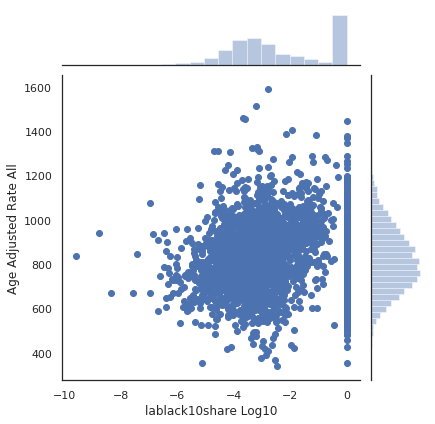

In [8]:
sns.jointplot(data = df, x = 'lablack10share Log10', y = 'Age Adjusted Rate All')

In [10]:
for target in target_list:
    # Bootstrap obersvations
    df_GLM_sample = df.sample(n = df.shape[0], replace = True)

    df_GLM = pd.concat([df, df_GLM_sample])
    
    # Drop if feature is na
    df_GLM = df_GLM.dropna(subset = [target])

    # Set X and y
    X = sm.add_constant(df_GLM[features_proportional_share])
    y = df_GLM[target]

    # Fit GLM Poisson 
    gamma_GLM = sm.GLM(y, X, family = sm.families.Poisson()).fit()

    print(gamma_GLM.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Age Adjusted Rate Endocrine   No. Observations:                 3310
Model:                                     GLM   Df Residuals:                     3295
Model Family:                          Poisson   Df Model:                           14
Link Function:                             log   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                -18221.
Date:                         Mon, 11 Feb 2019   Deviance:                       18560.
Time:                                 13:55:11   Pearson chi2:                 2.14e+04
No. Iterations:                              5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.5540      0.003   105

                       Generalized Linear Model Regression Results                       
Dep. Variable:     Age Adjusted Rate Circulatory   No. Observations:                 5857
Model:                                       GLM   Df Residuals:                     5842
Model Family:                            Poisson   Df Model:                           14
Link Function:                               log   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -63129.
Date:                           Mon, 11 Feb 2019   Deviance:                       83100.
Time:                                   13:55:11   Pearson chi2:                 8.57e+04
No. Iterations:                                5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.556

                       Generalized Linear Model Regression Results                       
Dep. Variable:     Age Adjusted Rate Intentional   No. Observations:                 1643
Model:                                       GLM   Df Residuals:                     1628
Model Family:                            Poisson   Df Model:                           14
Link Function:                               log   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -5362.6
Date:                           Mon, 11 Feb 2019   Deviance:                       3303.7
Time:                                   13:55:11   Pearson chi2:                 3.59e+03
No. Iterations:                                5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.650

                         Generalized Linear Model Regression Results                         
Dep. Variable:     Age Adjusted Rate MalignantBreast   No. Observations:                 1578
Model:                                           GLM   Df Residuals:                     1563
Model Family:                                Poisson   Df Model:                           14
Link Function:                                   log   Scale:                          1.0000
Method:                                         IRLS   Log-Likelihood:                -4180.7
Date:                               Mon, 11 Feb 2019   Deviance:                       1367.7
Time:                                       13:55:12   Pearson chi2:                 1.45e+03
No. Iterations:                                    4   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Age Adjusted Rate All   No. Observations:                 6105
Model:                               GLM   Df Residuals:                     6090
Model Family:                    Poisson   Df Model:                           14
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -1.0084e+05
Date:                   Mon, 11 Feb 2019   Deviance:                   1.4958e+05
Time:                           13:55:12   Pearson chi2:                 1.50e+05
No. Iterations:                        5   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.7158      0.001    1.2e+04      0.000       6.715       6.717
lablack10shar